# Surface Station Model Plotting


## Import
#### Import the needed modules + some

In [ ]:
from datetime import datetime, timedelta
from io import StringIO
from urllib.request import urlopen

from metpy.io import metar
#from metpy.plots import declarative
import metpy.plots as mpplots

from metpy.units import units
import pandas as pd

#You’ll note that the number of imports is smaller due to using the declarative syntax. There
#is no need to import Matplotlib or Cartopy to your code as all of that is done behind the scenes.

from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)

from metpy.plots import (add_metpy_logo, ColdFront, OccludedFront, StationaryFront,
                         StationPlot, WarmFront)


#This might be useful... (fronts, etc.)
#https://unidata.github.io/MetPy/latest/examples/plots/Plotting_Surface_Analysis.html
from metpy.io import parse_wpc_surface_bulletin

#DRL Add Cartopy
import cartopy.crs as ccrs

## Read Data

### 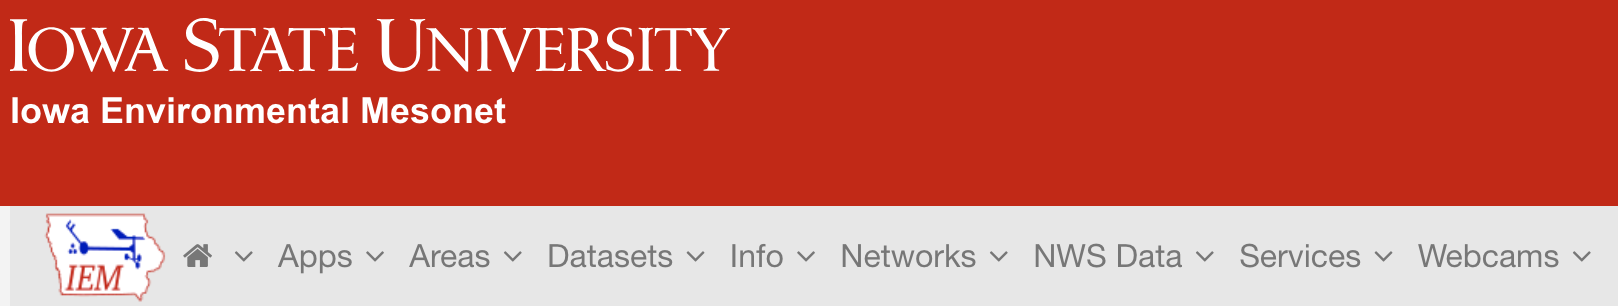 Here we gain access to surface data from the Iowa State Archive. To do so we construct the appropriate `data_url` that requires a start and end date. To create that we utilize the time we desire and add/subtract time from there to create a time window. From there we use the <a href="https://pandas.pydata.org/pandas-docs/stable/index.html" target="_blank">Pandas</a> module method <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">`read_csv()`</a> to read in all of the data, then parse the METAR observations using MetPy. For more on the API, see: https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?help

In [ ]:
#             yyyy mm dd  hh  (UTC)
date = datetime(2024, 11, 25, 12)

# Remote Access - Archive Data Read with pandas from Iowa State Archive, note there are differences from actual (official) 
# METAR file format. Here we are fetching data that is +/- 15 min from the date/time posted above
dt = timedelta(minutes=15)
sdate = date - dt
edate = date + dt
data_url = ('http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?'
            'data=all&tz=Etc/UTC&format=comma&latlon=yes&'
            f'year1={sdate.year}&month1={sdate.month}&day1={sdate.day}'
            f'&hour1={sdate.hour}&minute1={sdate.minute}&'
            f'year2={edate.year}&month2={edate.month}&day2={edate.day}'
            f'&hour2={edate.hour}&minute2={edate.minute}')

In [ ]:
# Where is the data coming from?


In [ ]:
#Pandas Read


#DRL Parse the Iowa State formatted METAR using MetPy module 
# https://unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_file.html



In [ ]:
#Add three columns to the dataframe (date time string, temp and dewpt in °F)


#DRL convert T, Td to °F and add the 2 columns to the data frame



In [ ]:
# Let's take a look at the variables that we could plot coming from our METAR observations.



## Plot Data
Here we exploit the full range of observations to plot around our station model to get a "full" surface station plot. In order to plot cloud cover and the current weather, we must use the formats to specify the "font" to use, which is part of MetPy. We could go further and change colors, fontsize, etc., but that is left as an excercise for the reader!

<div>
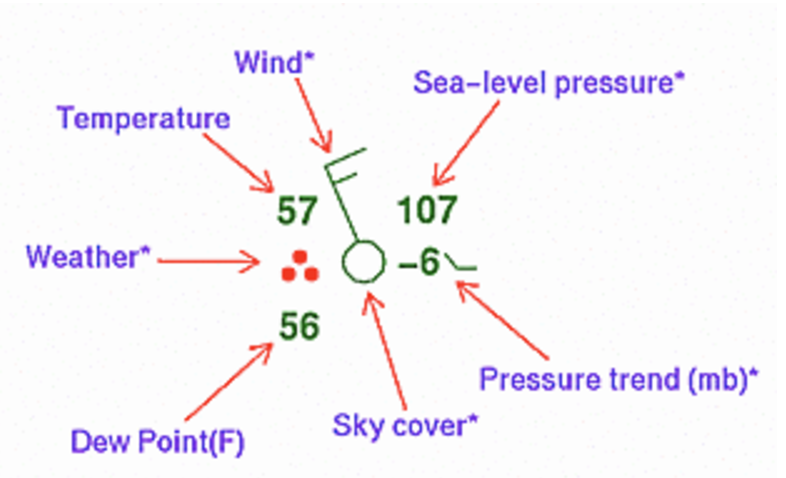
</div>

In [ ]:
#DRL the graphics used in this section use MetPy panels approach via MapPanel 
# https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.MapPanel.html

#DRL format the pressure and temperature



# Plot desired data. Note that a list of PlotObs traits can be found at:
# https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.PlotObs.html#metpy.plots.PlotObs.colors

              

#Place the fields around the station location


#Formatting the obs



#Controlthe observation density
#                 more dense --> less dense
obs.reduce_points = 0.5 #0.75  #1.0   

#Set up the wind barbs


#DR L, added a splash of color!
obs.colors = ['black', 'red', 'green', 'black', 'blue']

#DRL updated this section 
#Set up the MapPanel and layout


#The region (i.e., footprint) is set using area - which can be a tuple or string value. A tuple lets you set 
#longitude/latitude box based on the projection of the map (west-most, east-most, south-most, north-most). The 
#region can also be set to a string that represents preset areas see 
# https://unidata.github.io/python-training/workshop/Satellite_Data/declarative-satellite-data/

#DRL If you comment out panel.area below it will default to CONUS.

#panel.area = 'fl'  (Florida footprint - see above link for other preset regions)
#You can also enter lat/lon box (this can be done in other/more sophisticated ways - see earlier syntax problem!)
min_lon = -87.5
max_lon = -79.0
min_lat =  24.0
max_lat =  31.0 

#Set panel.area = to the lat/lon bound -> min longitude, max longitude, min latitude, max latitude
panel.area = 

#DRL Set LCC projection center latitude and longitude


#DRL I do not like the PlateCarree projection Sam I am. Changed it to LCC below. For more projection options see Cartopy:
# https://scitools.org.uk/cartopy/docs/latest/reference/projections.html  
#panel.projection = ccrs.PlateCarree()



# Bringing it all together (1 panel to rule them all!)
pc = PanelContainer()

pc.size = (10, 10)
pc.panels = [panel]

#Plot/save figure
#pc.show()
#Save image to file
pc.save('sfc_obs_test.png')

In [ ]:
#DRL Sanity Diagnostics

#obs.data
#obs.time_window 
#obs.level 
